#### Name: Ahmed Bilal Yousaf ......................................................................................................................................................................................................... Roll no: FA18-BCS-189-D ...........................................................................................................................................................................................  Assignment-01

### Importing Necessary Libraries:

In [1]:
import pandas as pd
pd.set_option("display.max.columns", None)                          # For displaying all the columns in the dataset
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 
df = pd.read_csv('data.csv')

### Displaying column names for further cleaning of data:

In [2]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

# 1. Cleaning the Fifa Dataset 2019:

### We can either drop rows containing null values or can replace null values with appropriate data type. If we drop rows, our data will reduce and it will effect the quality of our analysis so here i am going to replace all the null values through their specific data type weather its categorical or numerical or any other type. I will also apply some methods to convert string values into numeric values for prforming further statistic operations on them. As we have several columns whicih contain values as " 90 + 2  ", So here we will store 92 by adding 90 and 2. Similarly, we have other ambiguous data types which we will be converting for our ease.

#### Dropping unnecessary columns :

In [3]:
df.drop(['Real Face', 'Loaned From', 'Club Logo', 'Flag','Photo'], axis = 1, inplace = True)

#### - Checking value counts of certain doubtfull columns beforing cleaning:

In [4]:
df['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [5]:
df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

In [6]:
df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Messi                      1
Neymar                     1
Courtois                   1
Akinfenwa                  1
C. Ronaldo                 1
Name: Body Type, dtype: int64

#### - Filling the null values with appropriate data type:

In [7]:
df['Club'].fillna('No Club', inplace = True)                                                     #Categorical data
df['Preferred Foot'].fillna('Right', inplace = True)                                             #Categorical data 
df['International Reputation'].fillna(method = 'ffill', inplace = True)         #It will add the next filled value 
df['Weak Foot'].fillna(method = 'ffill', inplace = True)                        #It will add the next filled value
df['Skill Moves'].fillna(method = 'ffill', inplace = True)                      #It will add the next filled value
df['International Reputation'].fillna(method = 'ffill', inplace = True)         #It will add the next filled value
df['Work Rate'].fillna('Medium/  Medium', inplace = True)                                        #Categorical data
df['Position'].fillna('Unknown', inplace = True)                                                 #Categorical data

In [8]:
df['Body Type'] = df['Body Type'].replace(['Messi',
                                           'C. Ronaldo',        #Replacing Vague values through Categorical Values
                                           'Akinfenwa',
                                           'Shaqiri',
                                           'Neymar',
                                           'Courtois', 
                                           'PLAYER_BODY_TYPE_25'],
                                           'Normal')             
df['Body Type'].fillna('Normal', inplace = True)                                                  #Categorical data
df['Jersey Number'].fillna(method = 'bfill', inplace = True)                 #It will add the previous filled value


####  - Checking for value counts after cleaning:

In [9]:
df['Work Rate'].value_counts()                                           #Corrected Values

Medium/ Medium     9810
High/ Medium       3173
Medium/ High       1690
High/ High         1015
Medium/ Low         850
High/ Low           699
Low/ Medium         449
Low/ High           439
Medium/  Medium      48
Low/ Low             34
Name: Work Rate, dtype: int64

In [10]:
df['Preferred Foot'].value_counts()                                      #Corrected Values

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

In [11]:
df['Body Type'].value_counts()                                           #Corrected Values

Normal    10650
Lean       6417
Stocky     1140
Name: Body Type, dtype: int64

### *Method for converting Million (M) and thousand (K) into numeric values

In [12]:
#Converting string type values into numeric data to perform operations
def Float(euros):
    if euros[-1] == 'M' :
        return float (euros[1:-1]) * 1000000
    elif euros[-1] == 'K':
        return float (euros[1:-1]) * 1000
    else:
        return float (euros[1:])
    

df['Value'] = df['Value'].apply(lambda x: Float (x))
df['Wage'] = df['Wage'].apply(lambda x: Float (x))


### *Method for adding two numbers from a string data type

In [13]:
#Converting string type data into numeric for further operations
def addition(val):
    if type(val) == str:
        pt1 = val[0:2]
        pt2 = val[-1]
        val = int(pt1) + int(pt2)
        return val
    else:
        return val
groupOfColumns = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM',
                  'RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM',
                  'RDM','RWB','LB','LCB','CB','RCB','RB']
for col in groupOfColumns:
                  df[col] = df[col].apply(addition)
                  df[col].fillna(0.0, inplace = True)
df['LS']
# df.info()

0        90.0
1        94.0
2        87.0
3         0.0
4        85.0
         ... 
18202    44.0
18203    47.0
18204    47.0
18205    49.0
18206    45.0
Name: LS, Length: 18207, dtype: float64

### *Replacing null values by the mean of the whole feature/ Column: 

In [14]:
#We can take mean and replace it with null values as thier are all integer values in these columns
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['ShortPassing'].fillna(df['ShortPassing'].mean, inplace = True)

df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace = True)
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace = True)
df['Agility'].fillna(df['Agility'].mean(), inplace = True)
df['Balance'].fillna(df['Balance'].mean(), inplace = True)
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace = True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace = True)
df['Stamina'].fillna(df['Stamina'].mean(), inplace = True)
df['Strength'].fillna(df['Strength'].mean(), inplace = True)
df['LongShots'].fillna(df['LongShots'].mean(), inplace = True)
df['Aggression'].fillna(df['Aggression'].mean(), inplace = True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace = True)
df['Positioning'].fillna(df['Positioning'].mean(), inplace = True)
df['Vision'].fillna(df['Vision'].mean(), inplace = True)
df['Penalties'].fillna(df['Penalties'].mean(), inplace = True)
df['Composure'].fillna(df['Composure'].mean(), inplace = True)
df['Marking'].fillna(df['Marking'].mean(), inplace = True)
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace = True)
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace = True)
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace = True)
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace = True)
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace = True)
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace = True)
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace = True)
df['Reactions'].fillna(df['Reactions'].mean(), inplace = True)

In [15]:
df.head(20)

,Unnamed: 0,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Normal,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,Normal,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Normal,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,2142,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,10.0,"Jul 1, 2012",2020,5'8,163lbs,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0,81.0,84.0,61.0,89,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,2280,Right,4.0,4.0,4.0,High/ High,Lean,RCM,10.0,"Aug 1, 2012",2020,5'8,146lbs,80.0,80.0,80.0,88.0,87.0,87.0,87.0,88.0,90.0,90.0,90.0,89.0,91.0,91.0,91.0,89.0,85.0,84.0,84.0,84.0,85.0,82.0,74.0,74.0,74.0,82.0,86.0,72.0,55.0,93,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,80000000.0,455000.0,2346,Right,5.0,4.0,3.0,High/ Medium,Normal,RS,9.0,"Jul 11, 2014"

# 3. Task 3 (Displaying top names whose overall is greaater than 88 and potential > 90)

### It is a simple task in which i will first sort my data by 'Overall' column in descending order. Then i will store all the values whose overall is greater than 88 in the new dataframe. After wards i will extract values through conditioning 'Potential' column to values greater than 90. 

(array([  16.,  102., 1007., 2973., 5645., 4908., 2185., 1097.,  245.,
          29.]),
 array([48. , 52.7, 57.4, 62.1, 66.8, 71.5, 76.2, 80.9, 85.6, 90.3, 95. ]),
 <BarContainer object of 10 artists>)

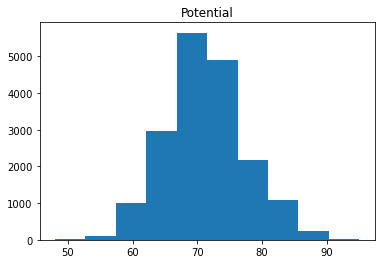

In [16]:
plt.title('Potential')
plt.hist(df['Potential'])

In [17]:
# plt.title('Overall')
# plt.hist(df['Overall'])

### Displaying in tabular form

In [18]:
dd = df.sort_values(by = 'Overall', ascending = False)[['Name','Overall','Potential']].head(30)

In [19]:
dd.drop(dd.loc[(dd.Potential <= 90)].index, inplace=True)


### Displaying in graphical form

(array([2., 1., 1., 1., 1., 2., 1., 1., 1., 2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

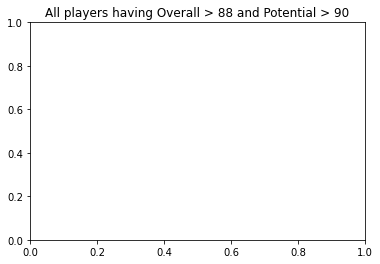

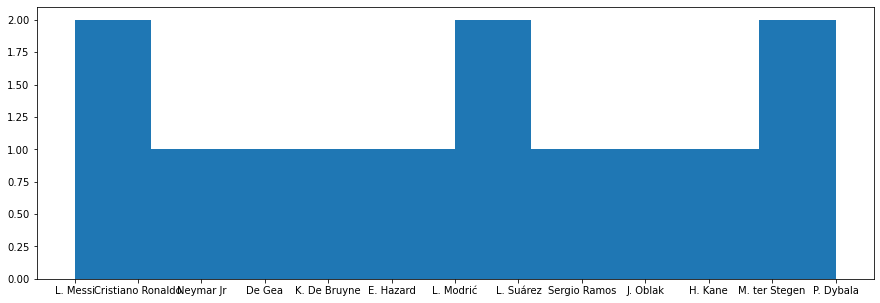

In [20]:
plt.title('All players having Overall > 88 and Potential > 90')
plt.figure(figsize = [15,5])
plt.hist(dd["Name"])

# Task 4. Plotting through seaborn Library

- Position count

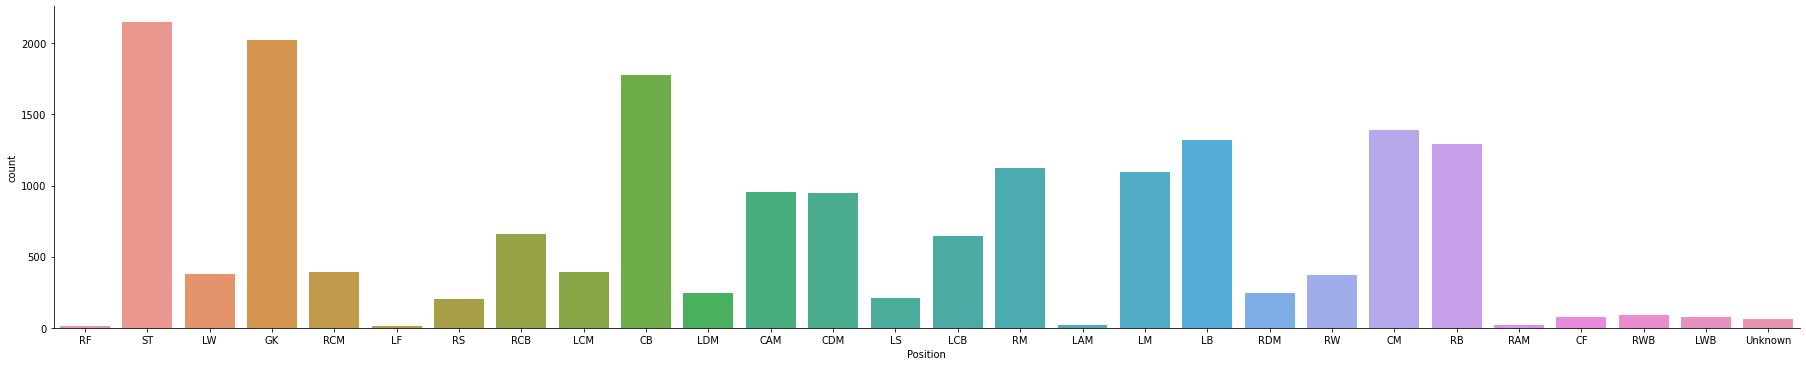

In [21]:
sns.catplot(x='Position', data = df, kind = 'count', aspect = 5)
plt.show()

- Number of players in each club

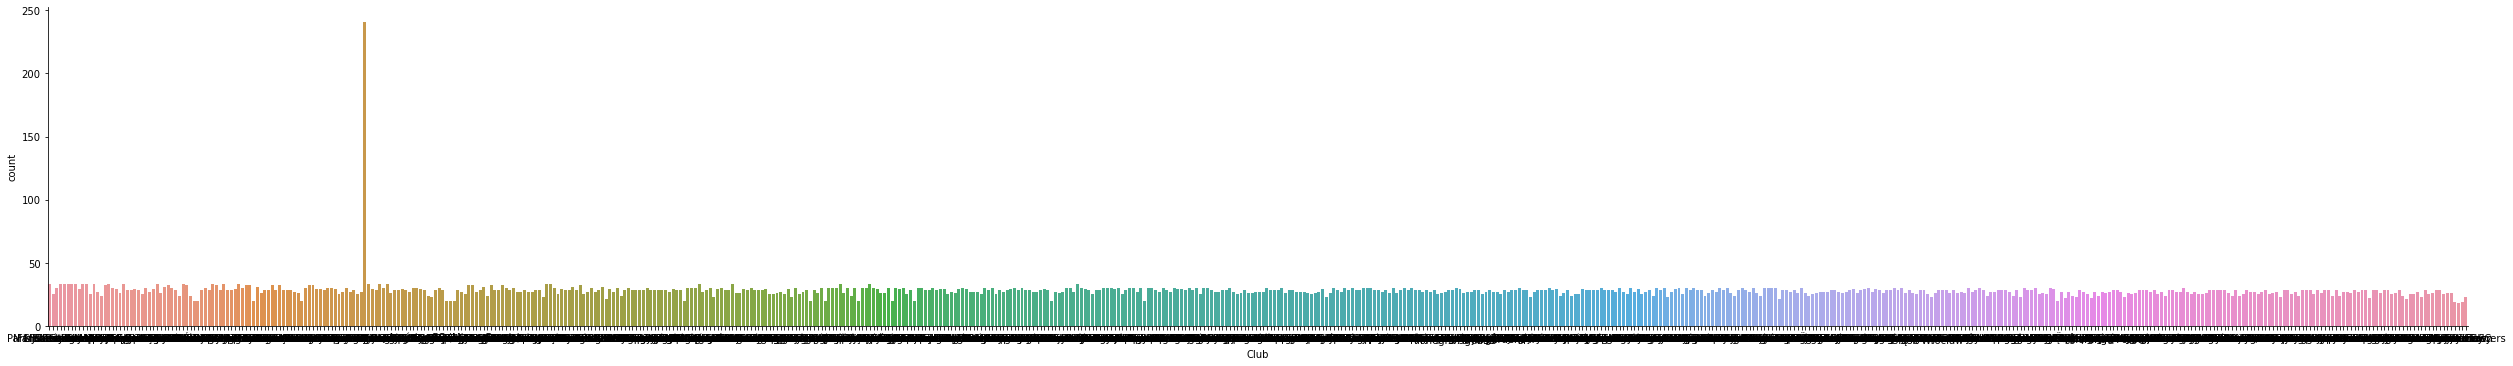

In [22]:
sns.catplot(x='Club', data = df, kind = 'count', aspect = 7)
plt.show()

- Plot between Position & Club count

C:\Users\Bilal Butt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Club', ylabel='count'>

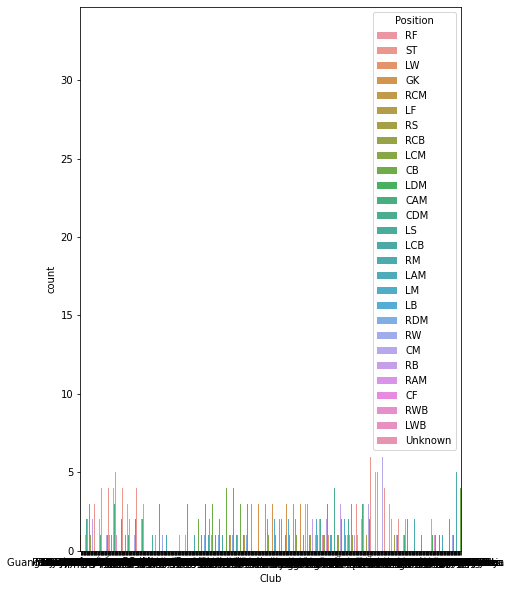

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot('Club', hue = 'Position', data = df)

# Task 5. Best Player for all position

In [28]:
best_players = df.loc[df.groupby('Position')['Overall'].idxmax()]
best_players[['Position', 'Name', 'Overall', 'Club','Value','Joined']].reset_index()

,index,Position,Name,Overall,Club,Value,Joined
0,17,CAM,A. Griezmann,89,Atlético Madrid,78000000.0,"Jul 28, 2014"
1,12,CB,D. Godín,90,Atlético Madrid,44000000.0,"Aug 4, 2010"
2,20,CDM,Sergio Busquets,89,FC Barcelona,51500000.0,"Sep 1, 2008"
3,271,CF,Luis Alberto,82,Lazio,28500000.0,"Aug 31, 2016"
4,67,CM,Thiago,86,FC Bayern München,45500000.0,"Jul 14, 2013"
5,3,GK,De Gea,91,Manchester United,72000000.0,"Jul 1, 2011"
6,28,LAM,J. Rodríguez,88,FC Bayern München,69500000.0,NaN
7,35,LB,Marcelo,88,Real Madrid,43000000.0,"Jan 1, 2007"
8,24,LCB,G. Chiellini,89,Juventus,27000000.0,"Jul 1, 2005"
9,11,LCM,T. Kroos,90,Real Madrid,76500000.0,"Jul 17, 2014"


# Task 6. Now checking for best player for certain Positions, and will also create               the  formation for 4-3-3 positions on the football field

### We will be analysing every best player for the respective positions. How we are going to do this? i found a way in which i will assign weights to the specific skill set of the player according to the position required and then see whose total value is greater at the end. Every position has different criteria. e-g For Goal Keeper position, i am taking 6 parameters, each of them have specific weightage like we do in our exams for specific questions. I know that a good goal Keeper must have good diving skills, So i am assigning diving parameter to the multiple of three so it have most weightage, likewise we do for all categories and positions.

# ..............................................4-3-3 Formation...................................................

## ...................................LW..........................St..............................RW............................................

## ..............................................CM..............DM................CM........................................................

## .......................................LB...........CB.................CB...............RB................................................

## ..................................................................GK...............................................................................                                                  

### Assigning Importance

In [ ]:
a = 1 # Least Important (It will not be used in the next code, it was just for demonstration )
b = 2 # Somewhere in between  
c = 3 # Top Priority

In [ ]:
df['sum'] =  df.LS + df.ST + df.RS + df.LW + df.LF + df.CF + df.RF + df.RW + df.LAM + df.CAM + df.RAM + df.LM + df.LCM + df.CM + df.RCM + df.RM + df.LWB + df.LDM + df.CDM + df.RDM + df.RWB + df.LB + df.LCB + df.CB + df.RCB + df.RB



In [ ]:
df['GoalKeeper'] = c * df.GKDiving + c * df.GKReflexes + c * df.ShotPower + c * df.Vision + b * df.Strength + b * df.Acceleration


In [ ]:
temp = df.sort_values(by = 'GoalKeeper', ascending = False)[:5]

### Converting to numpy array for performing further operations in  for visualization of our Data

In [ ]:
GoalKeeper = np.array((temp['GoalKeeper']))
Name = np.array((temp['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name,GoalKeeper,palette = "ch:s=.25,rot=-.25")
plt.xlabel("Best Goal Keeper")

#Storing name for creting dictionary at the end to display players name with their position
node = Name[0]   

# Ederson - (Goal Keeper)

# ..................................................................................................................................

### Now checking for Left Back Position (LB)

In [ ]:
df['bestLB'] =  c * df.LB + c * df.Acceleration + c * df.Balance + c * df.Stamina + c * df.Dribbling + c * df.SprintSpeed  + c * df.BallControl + c * df.Curve + + 0.5 * df['sum'].astype(float) 

In [ ]:
temp1 = df.sort_values(by = 'bestLB', ascending = False)[:5]
leftBack = np.array((temp1['bestLB']))
Name1 = np.array((temp1['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name1,leftBack,palette = "colorblind")
plt.xlabel("Best Left Back")

#Storing name for creting dictionary at the end to display players name with their position
node1 = Name1[0]

# Marcelo - (Left Back)

# ...........................................................................................................................

### Now checking for Right Back Position (RB)

In [ ]:
df['bestRB'] = df.RCB + 0.5 * df['sum'].astype(float) + df.Stamina + c * df.SlidingTackle + df.Agility + c * df.Reactions + df['Skill Moves'] + df['Weak Foot'] + df['Weak Foot']

In [ ]:
temp2 = df.sort_values(by = 'bestRB', ascending = False)[4:9]
rightBack = np.array((temp2['bestRB']))
Name2 = np.array((temp2['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name2,rightBack,palette = "flare")
plt.xlabel("Best Right Back")

#Storing name for creting dictionary at the end to display players name with their position
node2 = Name2[0]

# Jordi Alba - (Right Back)

# ....................................................................................................................................

### Now checking for Center Back Position (CB)

In [ ]:
df['bestCB'] = c * df.CB + b * df.RCB + c * df.Agility + c * df.SlidingTackle + c * df.StandingTackle + c * df.Strength + c * df.Positioning - df['Weak Foot'] + c * df.Volleys + df['Skill Moves'] + df['sum'].astype(float)

In [ ]:
temp3_4 = df.sort_values(by = 'bestCB', ascending = False)[:5]
centerBack = np.array((temp3_4['bestCB']))
Name3_4 = np.array((temp3_4['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name3_4,centerBack, palette = "pastel")
plt.xlabel("Best Center Back")

#Storing name for creting dictionary at the end to display players name with their position
node3 = Name3_4[0]
node4 = Name3_4[2]

# R. Nainggolan - (Center Back 1)
# A. Vidal - (Center Back 2)

# ...........................................................................................................................

### Now checking for Left Back Position (CM)

In [ ]:
df['centermid1'] =  c * df.CM + c * df.Aggression + c * df.Jumping + c * df['sum'].astype(float)

In [ ]:
temp5 = df.sort_values(by = 'centermid1', ascending = False)[2:7]
centerMid = np.array((temp5['centermid1']))
Name5 = np.array((temp5['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name5,centerMid,palette = "muted")
plt.xlabel("Best Center Mid")

#Storing name for creting dictionary at the end to display players name with their position
node5 = Name5[0]

# L. modric - (Central Mid-Fielder)

# .............................................................................................................................

### Now checking for Center Mid Fielder (CM)

In [ ]:
df['best_CM'] = c * df.Marking + c * df.CM + b * df.LCM + b * df.Aggression + b * df.Jumping + 0.5 * df['sum'].astype(float)

In [ ]:
temp6 = df.sort_values(by = 'best_CM', ascending = False)[:5]
centermid = np.array((temp6['best_CM']))
Name6 = np.array((temp6['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name6,centermid,palette = "bright")
plt.xlabel("Best Goal Keeper")

#Storing name for creting dictionary at the end to display players name with their position
node6 = Name6[0]

# N. Kante - (Central Mid-Fielder)

# ...............................................................................................................................

### Now checking for Center Defense Mid Fielder (CDM)

In [ ]:
df['bestDM'] = c * df.LB + c * df.ShotPower + df.Vision + b * df.Strength + b * df.Acceleration + c * df.FKAccuracy + df.Balance + c * df.LongShots + b * df.LongPassing+ b * df.Positioning + b * df.Stamina + c * df.StandingTackle + b * df.CB + df['sum'].astype(float)

In [ ]:
temp7 = df.sort_values(by = 'bestDM', ascending = False)[:5]
centermid = np.array((temp7['bestDM']))
Name7 = np.array((temp7['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name7,centermid,palette = "dark")
plt.xlabel("Best defence Center Mid")

#Storing name for creting dictionary at the end to display players name with their position
node7 = Name7[0]

# R. Nainggolan - (Central Defense-Fielder)

# .............................................................................................................................

### Now checking for Right Wing (RW)

In [ ]:
df['bestRW'] = c * df.ST + c * df.Acceleration + c * df.Balance + c * df.Stamina + c * df.Finishing + c * df.Dribbling + c * df.SprintSpeed  + c * df.BallControl + 0.5 * df['sum'].astype(float) 

In [ ]:
temp8 = df.sort_values(by = 'bestRW', ascending = False)[:5]
rightWing = np.array((temp8['bestRW']))
Name8 = np.array((temp8['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name8,rightWing, palette = "colorblind")
plt.xlabel("Best Left Wing")

#Storing name for creting dictionary at the end to display players name with their position
node8 = Name8[0]

# L. Messi - (Right Wing)

# .................................................................................................................

### Now checking for Left Wing (LW)

In [ ]:
df['bestLW'] = c * df.LW + c * df.Acceleration + c * df.Balance +  c * df.Stamina + c * df.Finishing + c * df.Dribbling + c * df.SprintSpeed + df['sum'].astype(float) + c * df.BallControl + b * df.GKPositioning + b * df.GKKicking + b * df.GKDiving

In [ ]:
temp9 = df.sort_values(by = 'bestLW', ascending = False)[:5]
leftWing = np.array((temp9['bestLW']))
Name9 = np.array((temp9['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name9,leftWing, palette = "deep")
plt.xlabel("Best Left Wing")

#Storing name for creting dictionary at the end to display players name with their position
node9 = Name9[0]

# Suarez - (Left Wing)

# .......................................................................................................................

### Now checking for Striker (St)

In [ ]:
df['Striker'] =  c * df.Stamina + c * df.SprintSpeed + c * df.Dribbling + c * df.ST + df.Acceleration

In [ ]:
temp10 = df.sort_values(by = 'Striker', ascending = False)[:5]
bestStriker = np.array((temp10['Striker']))
Name10 = np.array((temp10['Name']))

# Now we will plot for these two numpy arrays
sns.barplot(Name10,bestStriker,palette = "light:#5A9")
plt.xlabel("Best Striker")

#Storing name for creting dictionary at the end to display players name with their position
node10 = temp10.head(1)
node10

# Christiano Ronaldo - (Striker)

# .......................................................................................................................

### Creating Data Frame for displaying all the players

In [30]:
Best_players_for_4_3_3_position = {
    'Players':[node,node1,node2,node3,node4,node5,node6,node7,node8,node9,node10],
    'Positions':['GK','LB','RB','CB','CB','CM1','CM2','CDM','RW','LW','ST']
}

dataframe = pd.DataFrame(Best_players_for_4_3_3_position,columns = ['Players','Positions'])

NameError: name 'node' is not defined

# Best players for 4-3-3 Formation

In [ ]:
dataframe